## Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The `as` statement allows this. Here we use `np` and `pd` as aliases for `numpy` and `pandas`. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

In [6]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt
%matplotlib inline

## Tab Autocomplete

Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the `.` and pressing tab.

In [ ]:
np.random.

## Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [3]:
np.random.normal?

## Sampling

We'll sample some random data using a function from `numpy`.

In [7]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)

## Plotting
We can use the plotting library we imported as follows.

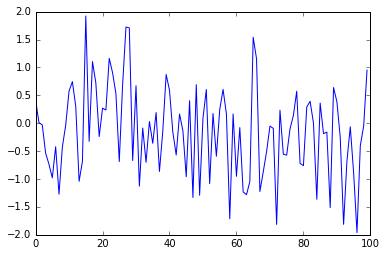

In [8]:
plt.plot(X)

## Squelching Line Output
You might have noticed the annoying line of the form [<matplotlib.lines.Line2D at 0x7f72fdbc1710>] before the plots. This is because the .plot function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

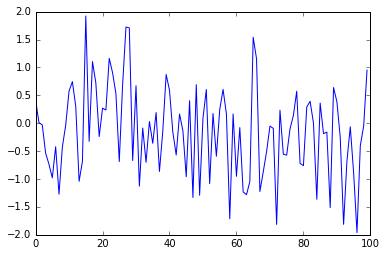

In [9]:
plt.plot(X);

### Adding Axis Labels

No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

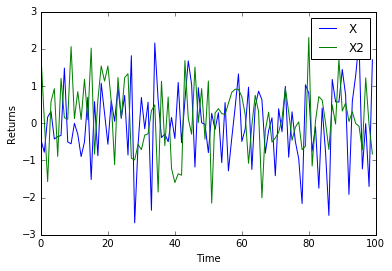

In [11]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

## Generating Statistics

Let's use `numpy` to take some simple statistics.

In [13]:
np.mean(X)

-0.028224577035056712

In [14]:
np.std(X)

0.9979192975502571

## Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

In [32]:
import Quandl as q
data = q.get('GOOG/FRA_MSF') #google finance dataset of Microsoft published at Quandl
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-08,52.38,52.52,52.20,52.27,3766.0
2016-08-09,52.39,52.55,52.27,52.38,5352.0
2016-08-10,52.12,52.26,51.75,51.85,4095.0
2016-08-11,52.00,52.27,51.90,52.13,5932.0
2016-08-12,52.26,52.36,51.57,51.62,8349.0


You can also search Quandl database for any data relating to Philippines here: https://www.quandl.com/search?query=philippines. To save and refrain from accessing the online database, let's pickle the data.

In [ ]:
import pickle

with open('MSF.pickle','wb') as f:
    pickle.dump(data, f)
MSF_in = open('MSF.pickle','rb') #read
data = pickle.load(MSF_in)

In [33]:
X = data['Close']

Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

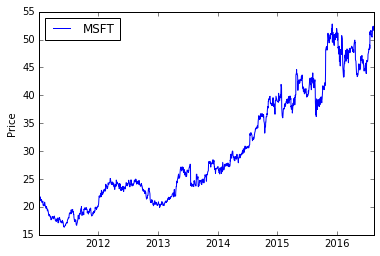

In [34]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT'], loc=2);

We can get statistics again on real data.

In [35]:
np.mean(X), np.std(X)

(30.161067415730336, 10.219039016032058)

## Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).

In [36]:
R = X.pct_change()[1:]

In [37]:
R.tail()

Date
2016-08-08    0.000383
2016-08-09    0.002104
2016-08-10   -0.010118
2016-08-11    0.005400
2016-08-12   -0.009783
Name: Close, dtype: float64

We can plot the returns distribution as a histogram.

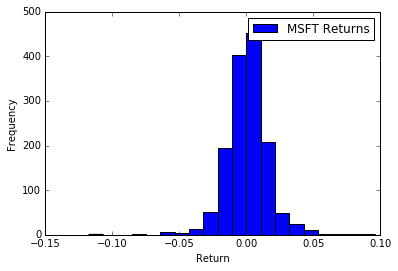

In [38]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

Get statistics again.

In [39]:
np.mean(R), np.std(R)

(0.00075635948423685262, 0.015623957945174094)

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

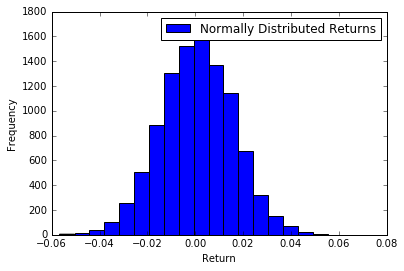

In [40]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

## Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

/home/dl/miniconda2/envs/finance/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  from ipykernel import kernelapp as app


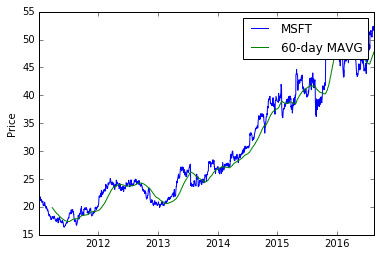

In [44]:
# Take the average of the last 60 days at each timepoint.
MAVG = pd.rolling_mean(X, window=60)
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);